In [1]:
import numpy as np

In [2]:
data=np.loadtxt("ex1data1.txt",dtype="float",delimiter=",")

In [9]:
X=data[:,0]
y=data[:,1]
print X.shape
print y.shape

(97,)
(97,)


In [10]:
#the number of training examples
m=len(y)

In [11]:
#reshaping both X and y. both X and y are of the shape of N,1
X=X.reshape(m,1)
y=y.reshape(m,1)


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


(-5, 25)

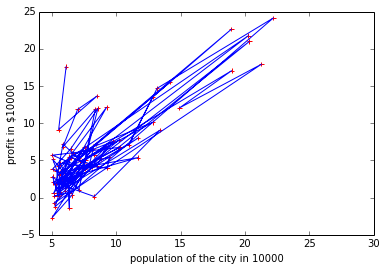

In [16]:
#for coloring in plt.scatter specifically mention the c arg, c arg is not the third arg in plt.scatter function
plt.scatter(X,y,c="r",marker="+")
plt.plot(X,y,"b-")
plt.xlabel("population of the city in 10000")
plt.ylabel("profit in $10000")
plt.xlim(4,30)
plt.ylim(-5,25)


In [56]:
#vstack(vertical stack) for rbind  hstack(horizontal stack) for cbind

ones=np.ones((m,1))
X=np.hstack((ones,X))

#initializing the theta

theta=np.zeros((2,1))

In [39]:
def computeCost(X,y,theta):
    m=X.shape[0]
    hx=np.dot(X,theta)
    cost=np.sum(np.square(hx-y))
    cost= 1./(2*m) *cost
    return cost

computeCost(X,y,theta)

#so the computeCost is correctly computing the cost of 32.07

32.072733877455654

In [88]:
def gradientDescent(X,y,theta):
    theta=np.zeros((2,1))
    iterations=1500
    alpha=0.01
    
    cost_history=np.empty(iterations)
    
    for i in range(iterations):
        hx=np.dot(X,theta)
        
#         #printing the cost to see that the cost is decreasing
        
        cost_history[i]=computeCost(X,y,theta)
#         print theta
        
#         grad_intercept=(1./m) * np.sum(hx-y)
        
#         print grad_intercept
        
#         grad_slope=(1./m) * (np.sum((hx-y)*X[:,1]))
        
#         print grad_slope
        
#         theta[0]=theta[0]-alpha*grad_intercept
#         theta[1]=theta[1]-alpha*grad_slope
        
        #computing the cost in vector fashion
        grad=(1./m)*alpha*np.sum((hx-y)*X,axis=0)
        grad=grad.reshape((2,1))
        theta=theta - grad
        
    return theta,cost_history

theta,cost_history=gradientDescent(X,y,theta)


(4, 10)

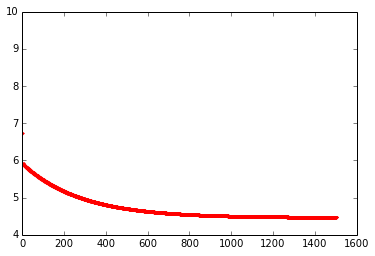

In [92]:
#plotting the cost history with iterations

plt.plot(range(1,iterations+1),cost_history,"r.")
plt.ylim(4,10)

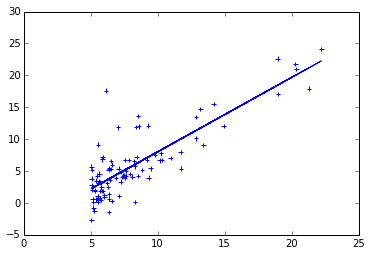

In [111]:
#plotting the regression line 
plt.scatter(X[:,1],y,c="b",marker="+")
plt.plot(X[:,1],np.dot(X,theta))

In [176]:
#Multiple linear regression

X_multi=np.loadtxt("ex1data2.txt",delimiter=",")




In [177]:
#normalizing the feature

X_multi=(X_multi-(np.mean(X_multi,axis=0)))/(np.std(X_multi,axis=0))


In [178]:
#adding an extra columns of 1's as the first column of the matrix

X_multi=np.hstack((np.ones((X_multi.shape[0],1),dtype="float"),X_multi))

y=X_multi[:,3]
y=y.reshape((X_multi.shape[0],1))

X_multi=X_multi[:,[0,1,2]]


In [179]:
def computeCostMulti(X_multi,y,theta):
    m=X_multi.shape[0]   #this is the number of training example in the dataset
    
    hx=np.dot(X_multi,theta)
    
    return (1/m)*(np.sum(np.square(hx-y),axis=0))

theta=np.zeros((3,1))

computeCostMulti(X_multi,y,theta)

array([ 0.])

In [180]:
print X_multi.shape
print theta.shape

(47, 3)
(3, 1)


In [181]:
def gradientDescentMulti(X_multi,y,theta):
    theta=np.zeros((3,1))
    
    alpha=0.01
    iterations=1500
    m=X_multi.shape[0]
    
    J_history=np.empty(iterations)
    
    for i in range(iterations):
        hx=np.dot(X_multi,theta)
        grad=np.sum((hx-y)*X_multi,axis=0)
        grad=grad/m
        
        #J_history[i]=computeCostMulti(X_multi,y,theta)
        grad=grad.reshape((3,1))
        theta=theta-alpha*grad
    return theta

theta=gradientDescentMulti(X_multi,y,theta)


In [23]:
np.ones((2,3))*np.array([[10],[1]])

array([[ 10.,  10.,  10.],
       [  1.,   1.,   1.]])

In [21]:
np.array([[2],[3]])

array([[2],
       [3]])

In [29]:
(np.sum((np.ones((2,3))),axis=0)).shape

(3,)

In [30]:
np.empty(100)

array([  0.00000000e+000,   0.00000000e+000,   1.44632687e-307,
         1.11261162e-306,   1.06811354e-306,   1.02360867e-306,
         5.00660292e-308,   6.89807867e-307,   9.34607074e-307,
         9.34554108e-307,   1.86919649e-306,   1.11260144e-306,
         1.78021798e-306,   1.29056593e-306,   1.11260144e-306,
         5.00666234e-308,   9.34568368e-307,   8.90115273e-308,
         1.16820791e-307,   8.90073681e-308,   7.56555669e-307,
         8.06610070e-308,   8.90062817e-307,   1.05699411e-307,
         7.56591658e-307,   1.95811117e-306,   1.11261502e-306,
         1.44632687e-307,   8.90068589e-308,   1.69110231e-306,
         1.11261502e-306,   1.44632687e-307,   1.22383646e-307,
         9.79069845e-307,   1.11262181e-307,   1.11257513e-307,
         8.06611343e-308,   9.34598925e-307,   1.22387720e-307,
         1.11258107e-307,   9.45698831e-308,   5.00660292e-308,
         9.34609790e-307,   1.00131210e-307,   8.06611767e-308,
         8.90067740e-308,   9.45697982e-